# Data Analysis Assessment

## Introduction
The dataset for this Data Analysis task has details of job posts across different job boards. 

## Data Loading and Package Imports

In [154]:
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os
import matplotlib.pyplot as plt

In [155]:
df = pd.read_csv("Dataset - Sheet1.csv")

In [200]:
df.sample(2)

,Position,Company,Location,Industry,Posted On,Extracted On,Job Type,Qualification,Job Description,Job Id,Experience,Start Date,End Date,Source
28,Data Analytics Intern,RHUX Analytics,"Tacoma, WA",Information Technology & Servicess,NaN,NaN,NaN,Bachelor's (Preferred),* Track and analyze key marketing and social m...,NaN,SQL: 1 year (Preferred)\nBusiness Analysis: 1 ...,NaN,NaN,https://www.internships.com/posting/sam_22fcdb...
207,Systems Engineering Intern,Sound Transit,"Seattle, WA 98104 (International District area)",Transportation/Trucking/Railroad,NaN,NaN,NaN,NaN,The Systems Engineering intern will support th...,NaN,NA-Feb 2020 Data,NaN,NaN,https://www.indeed.com/rc/clk?jk=0bc2d111d82ba...


## Data Analysis Questions

### 1. Analyze the data in the "Position" column and describe some of the characteristics of this data. Mention the top 3 Positions that are in high demand?

The data in the position column gives a brief idea of the title of each job postion. Every position has a different job title. In many cases the column also specifies if the position is part-time, full-time or just a summer internship opportunity. 

To identify the top 3 position of the column we want to count the number of times each postion has shows up in the position column and then look at the positions with the top 3 frequencies. It turns out the higest demand postions are Senior Software Engineer, Software Engineer Intern and Data Science Intern showing up 23, 9 and 9 times respectively. 

In [156]:
grouped_by_postion = df.groupby(by = "Position").size().to_frame('count').reset_index()

In [157]:
grouped_by_postion.sort_values(by='count', ascending=False).head(3)

,Position,count
316,Senior Software Engineer,23
374,Software Engineer Intern,9
70,Data Science Intern,9


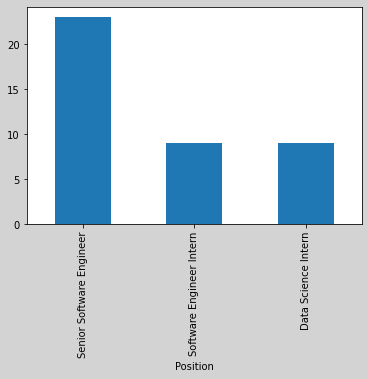

In [188]:
dx = grouped_by_postion.sort_values(by='count', ascending=False).head(3).plot.bar(x ='Position', y = 'count',legend=False, rot=90)
fig = dx.get_figure()
fig.patch.set_facecolor('lightgrey')
fig.savefig('position.png',bbox_inches='tight',dpi = 300)

### 2. How many different companies have a job listing in the given dataset? What is the average count of jobs listed per company?

The data in the company column gives a list of names of companies who have job openings. In many cases the same company has mulitple job listings. To identify the number of different companies with a job listing we had to count the number of unique company names that shows up in the company column. There was a total 293 companies who posted jobs. 

In [159]:
df['Company'].nunique()

293

In [160]:
df_company = df.groupby(by = "Company").size().to_frame('count').reset_index()

We found the number of jobs for each company. Here is a plot of the top 10 companies by the number of jobs they posted.  

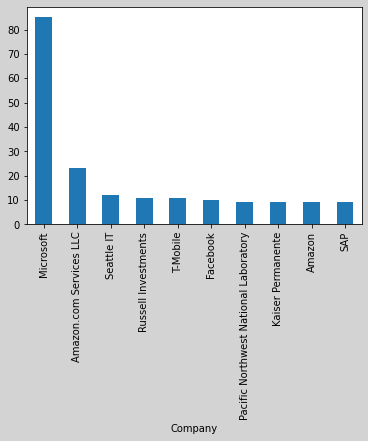

In [187]:
ax = df_company.sort_values(by='count', ascending=False).head(10).plot.bar(x ='Company', y = 'count', rot=90, legend=False)
fig = ax.get_figure()
fig.patch.set_facecolor('lightgrey')
fig.savefig('company_figure.png',bbox_inches='tight',dpi = 300)

Then we took the mean, which is 2.068 jobs posted per company.

In [126]:
df_company["count"].mean()

2.068259385665529

### 3. Which industry is associated with the most job listings? Which has the least?

The data in the industry column gives a list of names of various industries who have job opening. To identify the industry with the maximum and minimum job listings we have to count the number of times each industry name was mentioned in the industry column.

To identify the industries with the maximum number of job listing we want to count the number of times each industry shows up in the industry column and then look at highest frequencies. It turns out the industries with the maximum number of job listings  are Computer Software, Information Technology & Servicess and Software & Tech Services having 129, 62 and 58 job postings respectively.

In [31]:
df_industry = df.groupby(by = "Industry").size().to_frame('count').reset_index()

In [32]:
df_industry.sort_values(by='count', ascending=False).head(3)

,Industry,count
14,Computer Software,129
40,Information Technology & Servicess,62
64,Software & Tech Services,58


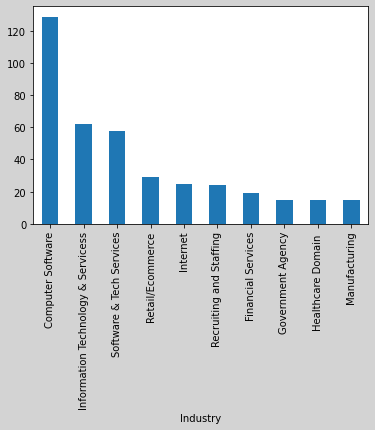

In [190]:
ex = df_industry.sort_values(by='count', ascending=False).head(10).plot.bar(x ='Industry', y = 'count', rot=90, legend=False)
fig = ex.get_figure()
fig.patch.set_facecolor('lightgrey')
fig.savefig('Industry.png',bbox_inches='tight',dpi = 300)

### Which industry is associated with the least job listings

To identify the industries with the minimum job listing we want to count the number of times each industry shows up in the industry column and then look at lowest frequencies. It turns out the minimum job listing industries are Pulp and Paper Industry, Healthcare software company, Social Services, Hotel and Software life Science, each just having one job posting.

In [127]:
df_industry.sort_values(by='count', ascending=True).head(5)

,Industry,count
56,Pulp and Paper Industry,1
34,Healthcare software company,1
63,Social Services,1
37,Hotel,1
65,Software life Science,1


### 4. Which location is associated with the most job listings? What is the average number of listings per location?

The data in the location column identifies the location for each job posting. To identify the location with the maximum job posting we have to count the number of times each location shows up in the location column.

It turns out the location with maximum job listing are Seattle WC, Seattle, WA, Social Services, Redmond, WA 98052 (Overlake area),Bellevue, WA and Redmond, WA with 193,162,40,30 and 29 job listing respectively. It is clear that Redmond has two entries here, which should not be the case, but we will revisit this issue later on.



In [35]:
df_location = df.groupby(by = "Location").size().to_frame('count').reset_index()

In [36]:
df_location.sort_values('count', ascending=False).head(5)

,Location,count
48,Seattle WC,193
49,"Seattle, WA",162
37,"Redmond, WA 98052 (Overlake area)",40
6,"Bellevue, WA",30
36,"Redmond, WA",29


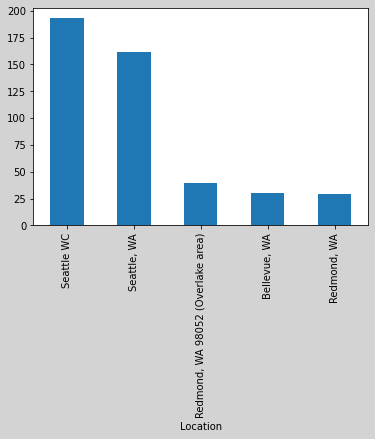

In [196]:
fx = df_location.sort_values(by='count', ascending=False).head(5).plot.bar(x ='Location', y = 'count', rot=90, legend=False)
fig = fx.get_figure()
fig.patch.set_facecolor('lightgrey')
fig.savefig('location.png',bbox_inches='tight',dpi = 300)

## What is the average number of listings per location?

To identify the average number of listing we need to count the number of job posting in each of those location and then take an average of them. The average is 9.571429. This means on that on average each location has 9.57 jobs listed. 

In [38]:
df_location.sort_values('count').mean()

count    9.571429
dtype: float64

### 5. If you had to identify all the jobs that require data skills, how would you identify them? How many jobs require data skills?

To identify which jobs require data skill I would check both "Experience" and "Job Description" column to see if the word "data" is mentioned. If the word "data" is mentioned in either of those columns, I think it is safe to assume that the job requires data skills.

Next we identify only the rows that have data in either the "Experience" or the "Job Description" column, in other words, when the column I defined as "Sum" has a value greater than or equal to 1 and add them up. Here we found 585 jobs out of 606 job postings (or 96.5% of jobs) need data skills. 

In [49]:
df['Experience_contains_data'] = df['Experience'].str.contains("data", case=False)*1

In [50]:
df['JD_contains_data'] = df['Job Description'].str.contains("data", case=False)*1

In [51]:
df['Sum'] = df['Experience_contains_data'] + df['JD_contains_data'] 

In [65]:
jobs_that_require_data_skills = df.loc[(df["Sum"]>=1)]

In [73]:
len(jobs_that_require_data_skills)

585

In [117]:
len(jobs_that_require_data_skills)/len(df)

0.9653465346534653

### 6. Based on the "Qualification" column, identify job listings that require applicants who are either pursuing or have completed a Bachelor's Degree. What is the count of such jobs?

To identify the job listing that requires bachelor's degree from the qualification column we need to check multiple factors. We check if the qualification column for each has any of the following words 

* bachelor 
* master (to be in a masters program, you mist have completed a bachelor's)
* phd (to be in a phd program, you mist have completed a bachelor's)
* b.s 
* b.a
* undergrad

We found approximately 159 jobs requires a minimum of bachelor's degree out of the total 606 jobs posted, or 26% of jobs require applicants who are either pursuing or have completed a Bachelor's Degree. 

In [111]:
list_of_words = ["bachelor","master","analytics","phd","ph.d","b.a","b.s", "undergrad"]
for word in list_of_words:
    print(word)
    df['Ql_contains_'+word] = (df['Qualification'].str.lower(
    ).str.replace("'","").str.contains(word, case=False))

bachelor
master
analytics
phd
ph.d
b.a
b.s
undergrad


In [75]:
df['Qualification'].str.contains("Bachelor's Degree")

0      Enrolled in Master’s or Ph.D. degree in math, ...
1      maintaining a GPA of 3.0 or higher\nstudents c...
2      College Junior-standing with target graduation...
3      Currently has, or is in the process of obtaini...
4      B.Sc. in molecular and computer science, cellu...
                             ...                        
601               Required graduation year : 2021 - 2025
602                                                  NaN
603    1st year onwards (Undergraduate). 2. Min 3.0 C...
604    Actively pursuing a degree in Statistics, Anal...
605    2+ years of experience or equivalent education...
Name: Qualification, Length: 606, dtype: object

In [113]:
df['Ql_sum'] = df[[x for x in df.columns if 'Ql_' in x]].sum(axis=1)

In [114]:
jobs_that_require_bachelor_degree = df.loc[(df['Ql_sum']>=1)]

In [115]:
len(jobs_that_require_bachelor_degree)

159

In [116]:
len(jobs_that_require_bachelor_degree)/len(df)

0.2623762376237624

# 7. Perform an Exploratory Data Analysis and present the summary of your analysis.
## Identify further questions related to the provided dataset that a database manager or a data analyst should explore

* A database manager or a data analyst shoud explore data quality issues. Some of the one I found are:
    * Position quality issues: Same position has many names. For example, should Data Analytics and Data analysts be considered separate positions or one and the same?
        * Possible solution: Perhaps we can replace the word Analytics with the word Analyst in the Postion column.
    * industry quality issues: Are Computer Software, Information Technology & Services and Software & Tech Services really different indistries?
        * Possible solution: Perhaps we can replace find industries that are related and put them in one group.
    * Location quality issues: Same location has multiple names: Are Redmond, WA 98052 (Overlake area) and Redmond, WA the same location? Should Seattle, WA 98101 (Downtown area) and Seattle, WA be considered the same?
        * We can remove extra information like zip code and neighborhoods and keep only City and State.

In [130]:
grouped_by_postion.sort_values(by='count', ascending=False).head(10)

,Position,count
316,Senior Software Engineer,23
374,Software Engineer Intern,9
70,Data Science Intern,9
57,Data Analyst Intern,8
447,Web Developer,8
125,Intern,6
60,Data Analytics Intern,5
54,Dashboard & Analytics Internship,4
351,Senior Web Developer,4
380,Software Engineering Intern,4


In [131]:
df_industry.sort_values(by='count', ascending=False).head(10)

,Industry,count
14,Computer Software,129
40,Information Technology & Servicess,62
64,Software & Tech Services,58
60,Retail/Ecommerce,29
42,Internet,25
58,Recruiting and Staffing,24
27,Financial Services,19
31,Government Agency,15
33,Healthcare Domain,15
47,Manufacturing,15


In [132]:
df_location.sort_values('count', ascending=False).head(10)

,Location,count
48,Seattle WC,193
49,"Seattle, WA",162
37,"Redmond, WA 98052 (Overlake area)",40
6,"Bellevue, WA",30
36,"Redmond, WA",29
38,"Redmond, Washington",20
40,Remote,15
50,"Seattle, WA 98101 (Downtown area)",10
15,"Bothell, WA",7
0,"\nSeattle, WA",7
